# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as sps
import pandas as pd


red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

sns.set_style("whitegrid")

## Выборочные квантили

### Загрузка данных

В данной задаче вы изучите структуру графика `boxplot` и познакомитесь с выборочными квантилями.

Загрузите данные экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `pCAMKII_N`
* `pELK_N`
* `ARC_N`

In [2]:
data = pd.read_csv('Data_Cortex_Nuclear_quantilie.csv')
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


### Подсчет выборочных квантилей

Для посчета выборочных квантилей в библиотеке `numpy` есть функция `numpy.quantile`. На вход ей передается исследуемый массив и значение квантиля.

Посчитайте с помощью этой функции выборочную медиану для признака `pCAMKII_N`

In [3]:
np.quantile(data["pCAMKII_N"], 0.5)

nan

Функция должна вернуть `nan`. Проверьте столбец на наличие пропусков, выведите их количество

In [4]:
data['pCAMKII_N'].isna().sum()

3

Получите значение выборочной медианы, удалив пропуски

In [5]:
np.quantile(data["pCAMKII_N"].dropna(), 0.5)


3.3296242815

Для работы с пропущенными значениями в `numpy` есть специальная функция `numpy.nanquantile`

Посчитайте значение выборочной медианы с использованием этой функции (пропуски не удаляйте) и сравните ответы

In [6]:
np.nanquantile(data["pCAMKII_N"], 0.5)


3.3296242815

ответы совпадают

### Визуализация квантилей и изучение boxplot

Допишите функцию для совместной визуализации `boxplot` и гистограммы с нанесенными на нее квантилями

In [7]:
def draw_quintiles(data, alphas, ymax=0.4):
    '''
    data: pd.Series - столбец из рассматриваемого признака
    alphas: list[float] - массив из значений интересуемых квантилей, которые будут отрисованы
    ymax: float - максимальное значение для вертикальных линий на гистограмме
    '''
    title = data.name
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(14, 8))
    f.suptitle(f"Распределение {title}")

    sns.boxplot(x=data, ax=ax_box, color=blue)

    for alpha in alphas:
        nearest = data.quantile(alpha)
        ax_hist.vlines(nearest, 0, ymax, color="red", label=f'{alpha} квантиль')
    sns.histplot(data=data, kde=True, ax=ax_hist, stat='density')

    plt.legend()
    plt.show()

Какие квантили соответствуют границам "ящика с усами"? Допишите их и нарисуйте графики для разных признаков

In [8]:
alphas = [0.25, 0.5, 0.75]

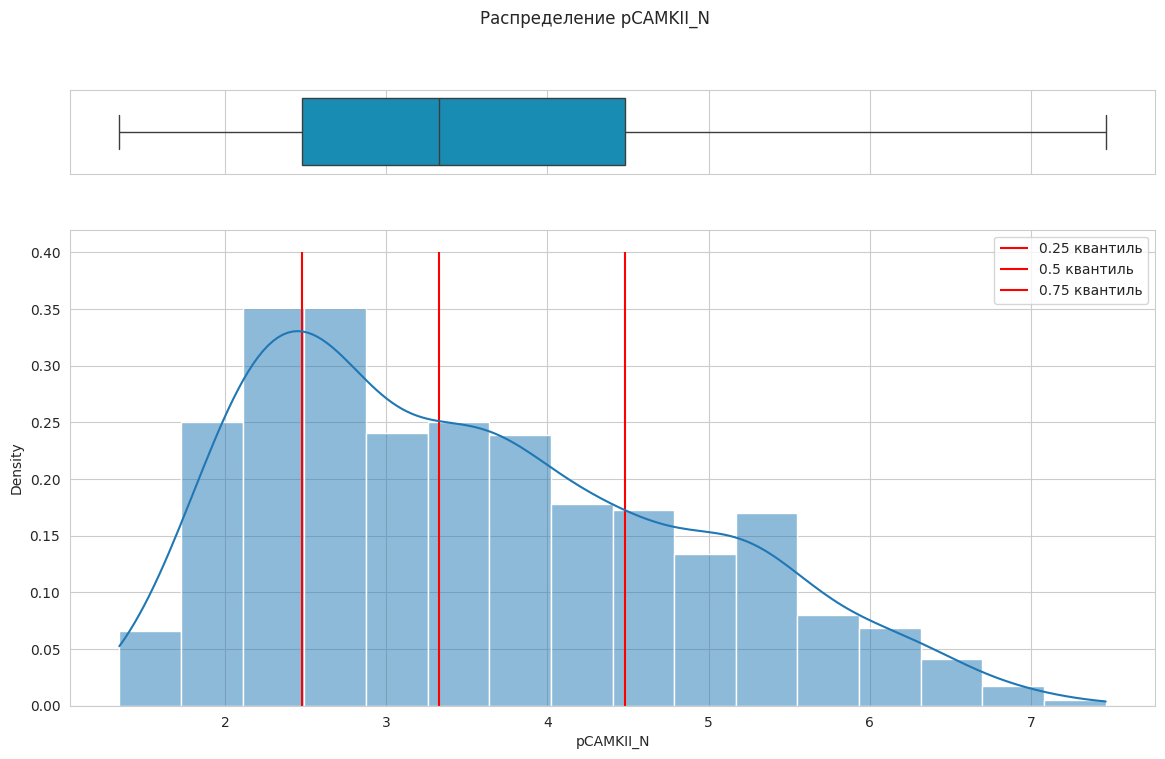

In [9]:
draw_quintiles(data.pCAMKII_N, alphas)

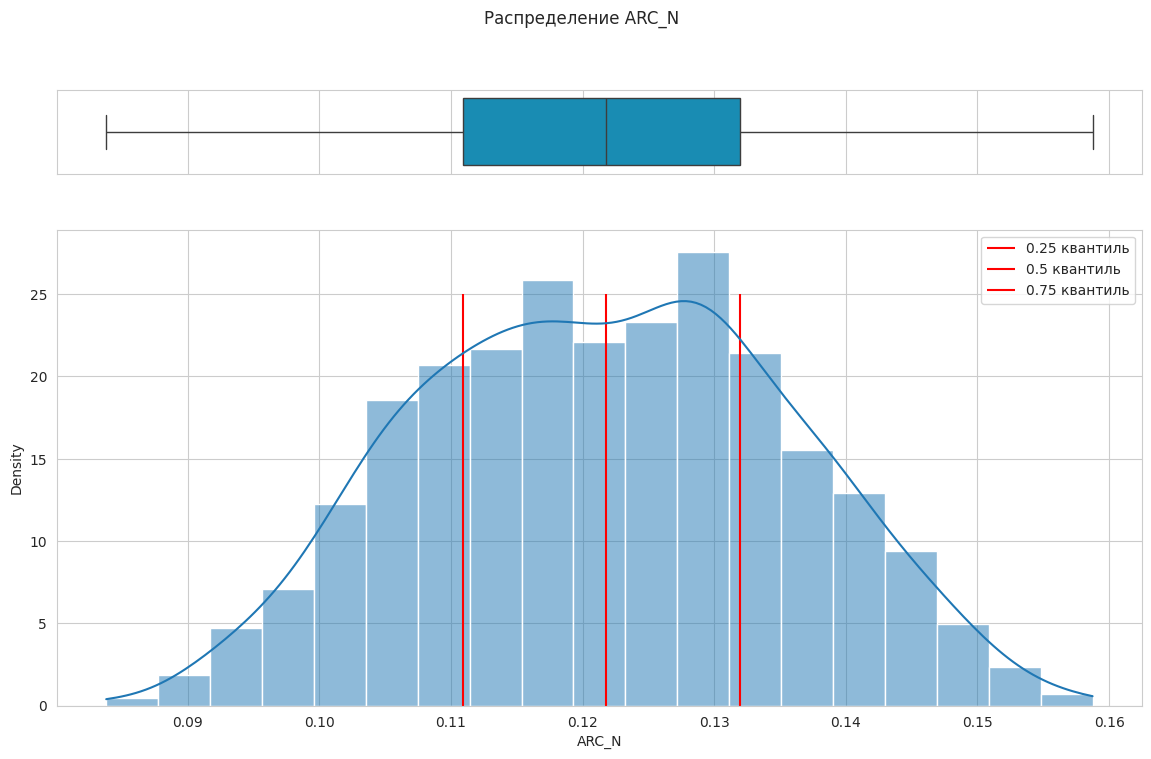

In [10]:
draw_quintiles(data.ARC_N, alphas, 25)

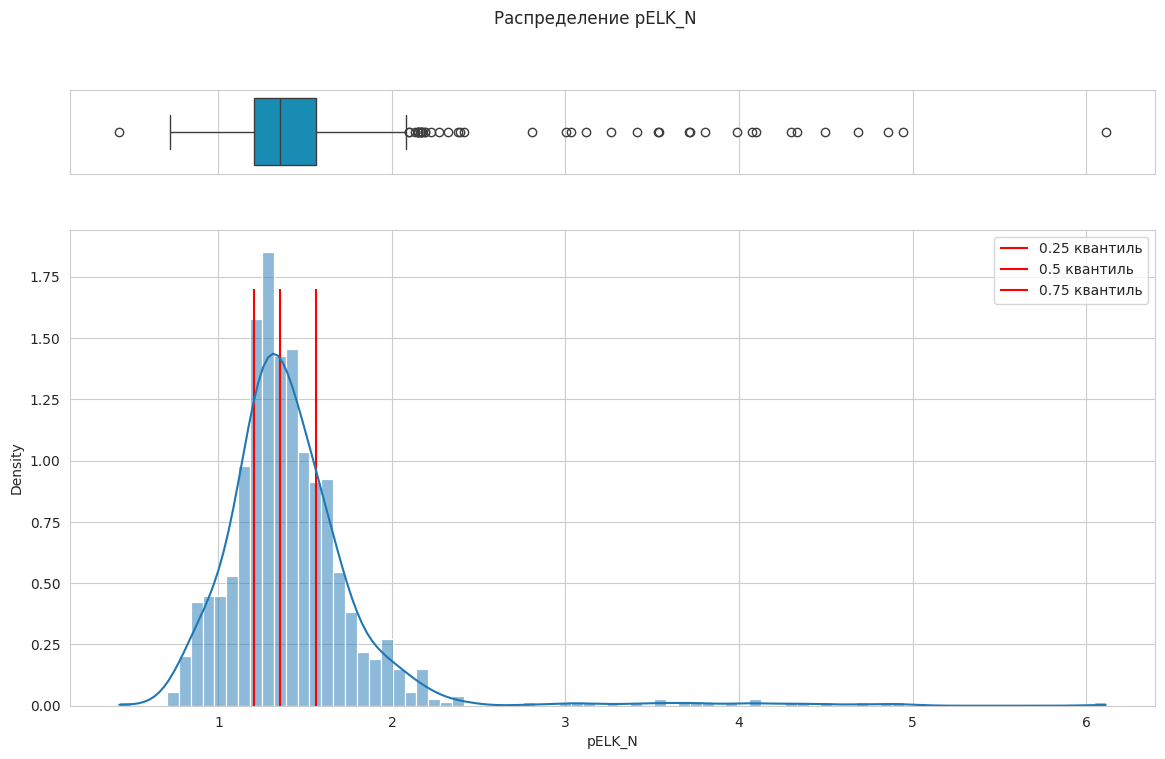

In [11]:
draw_quintiles(data.pELK_N, alphas, 1.7)

Сделайте вывод

**Ответ:** Квантили помогают нам провести первичный анализ выбросов в наих данных. Значения за пределами 1,5 * IQR можно считать выбросами, их мы можем наблюдать на 3 графике. Также мы можем условиться считать, что значения будут низкими, если они меньше 1 квантиля и высокими, если они больше 3 квантиля.

###  Сравнение медианы и среднего

Постройте гистограммы для каждой выборки, отметьте на них положение среднего и медианы. Объясните причины полученных расхождений (в случае их наличия)

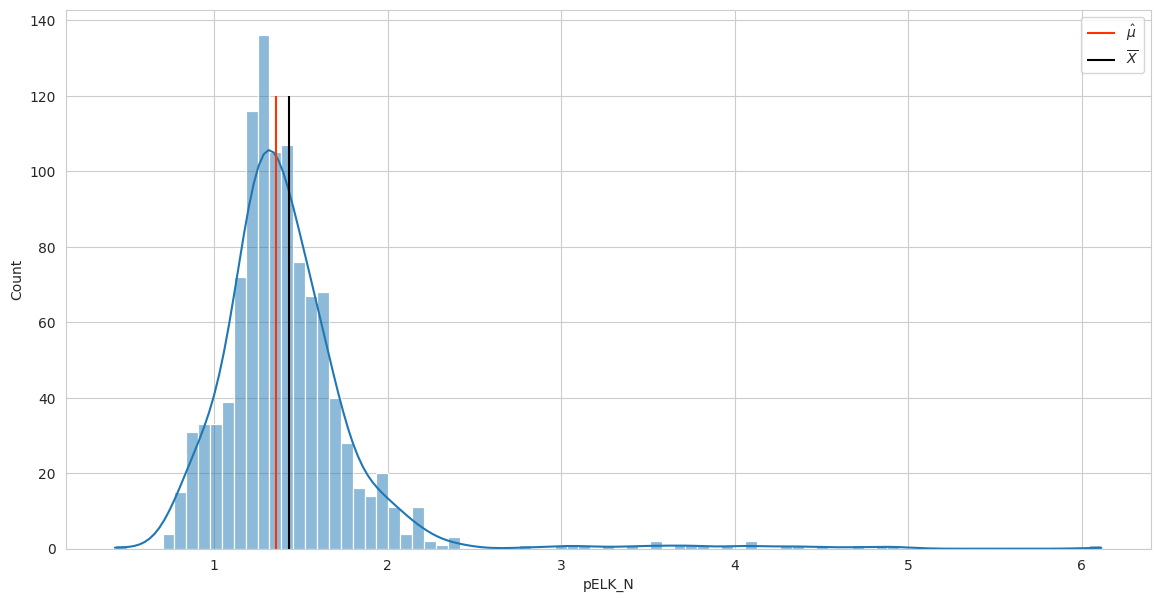

In [12]:
plt.figure(figsize=(14,7))
sns.histplot(data['pELK_N'],kde=True)

median_value = np.nanquantile(data['pELK_N'], 0.5)
mean_value = np.mean(data.pELK_N)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** медиана визуально ближе к центру, т.е. она более устойчива к выбросам, чем среднее

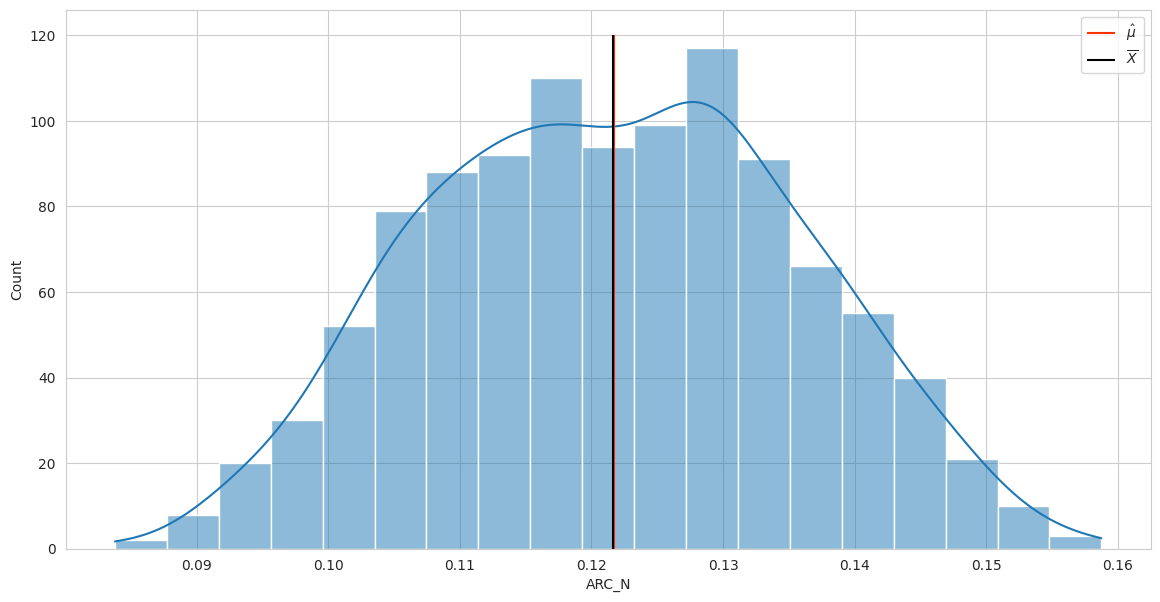

In [13]:
plt.figure(figsize=(14,7))
sns.histplot(data['ARC_N'],kde=True)

median_value = np.nanquantile(data['ARC_N'], 0.5)
mean_value = np.mean(data.ARC_N)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** расхождений нет

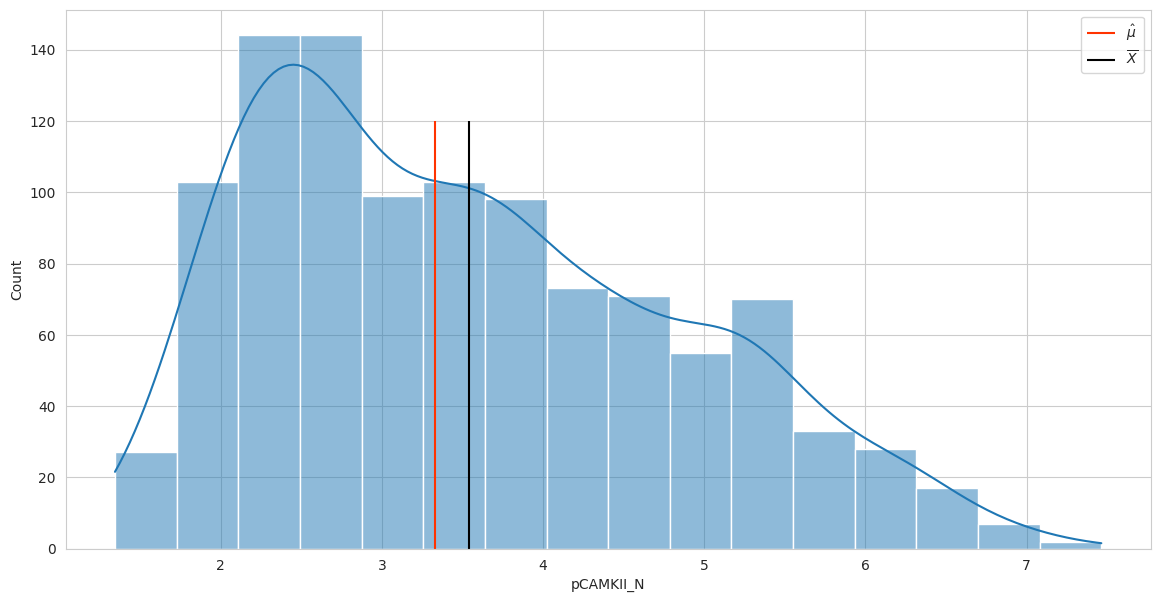

In [14]:
plt.figure(figsize=(14,7))
sns.histplot(data['pCAMKII_N'],kde=True)

median_value = np.nanquantile(data['pCAMKII_N'], 0.5)
mean_value = np.mean(data.pCAMKII_N)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** медиана визуально ближе к центру, т.е. она более устойчива к выбросам, чем среднее

###  Устранение выбросов

Межквантильным размахом `IQR` называется расстояние между первым и третьем квартилем. Выбросами же принято счиать наблюдения которые находятся за пределами первого или же третьего квантиля на расстоянии более $1.5  \times \text{IQR}$.
Выберете признак с наиболее характерными выбросами, удалите их.

In [15]:
Q1 = np.nanquantile(data.pELK_N, 0.25)
Q3 = np.nanquantile(data.pELK_N, 0.75)
IQR = Q3 - Q1
no_outliers = data.pELK_N[(Q1 - 1.5*IQR < data.pELK_N) &  (data.pELK_N < Q3 + 1.5*IQR)]

Выведите гистограмму обработанной выборки и отметьте на нем положения среднего и медианы

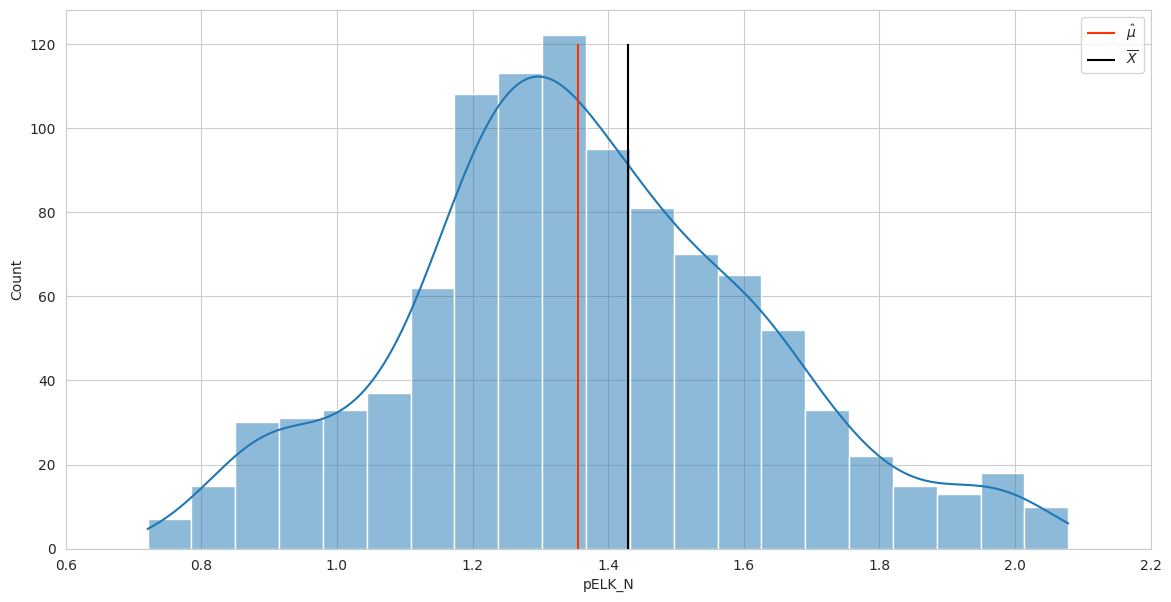

In [16]:
plt.figure(figsize=(14,7))
sns.histplot(no_outliers, kde=True)


median_value = np.nanquantile(data['pELK_N'], 0.5)
mean_value = np.mean(data.pELK_N)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.xlim(0.6, 2.2)
plt.legend();

А теперь постройте график на неотфильтрованный данных (как в предыдущем пункте). Для наглядности сравнения поставьте соответствующие границы для оси Ox.

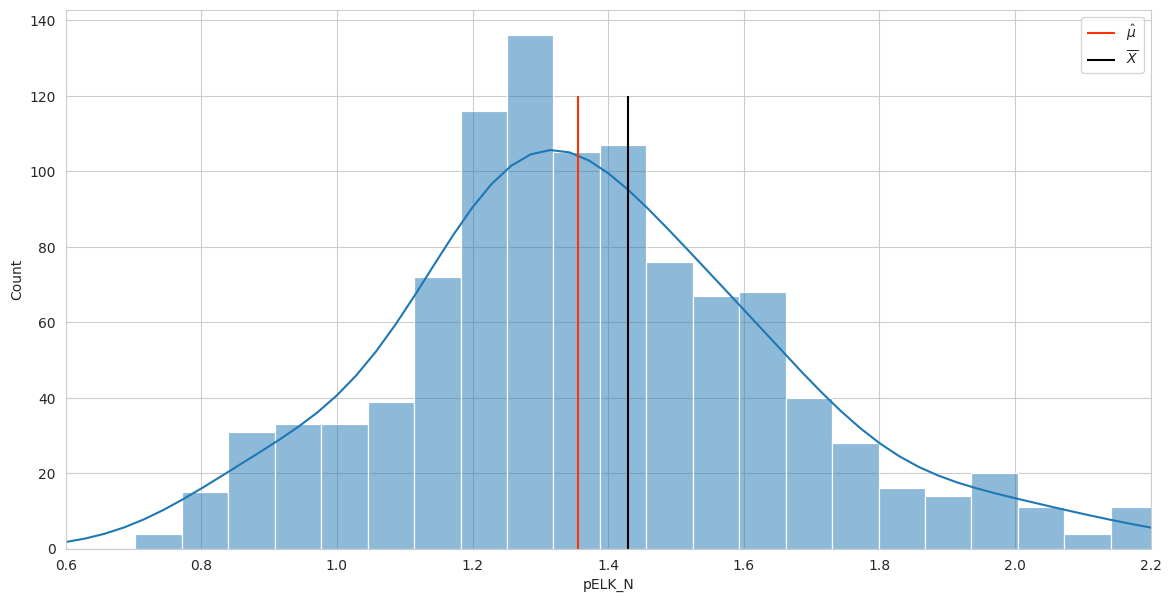

In [17]:
plt.figure(figsize=(14,7))
sns.histplot(data['pELK_N'],kde=True)

median_value = np.nanquantile(data['pELK_N'], 0.5)
mean_value = np.mean(data.pELK_N)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.xlim(0.6, 2.2)
plt.legend();

Объясните изменение положения оценок

**Ответ:** выкидывая выбросы мы можем снизить дисперсию, что улучшает нашу оценку. На графике мы видим, как наши среднее и медиана приблизились к центру, когда мы убрали выбросы